# Differansemetoder for to-punkts randverdiproblemer. 

**Anne Kværnø**

$\newcommand{mb}[1]{\mathbf{#1}}$
# Innledning 
Tidligere i kurset har dere diskutert parabolske, elliptiske og hyperbolske differensialligninger, og hvordan disse kan løses eksakt ved hjelp av separasjon av variable og Fourier-rekker. 

Her skal vi se på hvordan slike ligninger kan løses numerisk ved hjelp av _endelig differanse-metoder_. 
Det er ikke lenger snakk om å lage en genererisk algoritme for å løse en stor gruppe av differensialligninger, men om en teknikk som må anvendes på den ligningen en nå har for hånden. Så lær deg teknikken og ideene, ikke pugg formler!

I dette notatet introduserer vi ideen på et to-punkts randverdiproblem.  

Følgende differanseformler kommer til å bli hyppig brukt:  

\begin{align*}
   f'(x) &= 
   \begin{cases} \displaystyle
     \frac{f(x+h)-f(x)}{h} - \frac{h}{2}f''(\xi) & \text{Foroverdifferanse} \\ \displaystyle 
     \frac{f(x)-f(x-h)}{h} + \frac{h}{2}f''(\xi) & \text{Bakoverdifferanse} \\ \displaystyle
     \frac{f(x+h)-f(x-h)}{2h} - \frac{h^2}{6}f'''(\xi) & \text{Sentraldifferanse} 
   \end{cases} \\ \mbox{} \\
   f''(x) & = 
  \frac{f(x+h)-2f(x)+f(x-h)}{h^2} - \frac{h^2}{12}f^{(4)}(\xi), \qquad \text{Sentraldifferanse}
\end{align*}


# Et to-punkts randverdiproblem

Gitt differensialligningen

$$ 
u'' + p(x) u' + q(x) u = r(x), \qquad a \leq x \leq b, \qquad u(a)=u_a, \quad u(b)=u_b, 
$$

der $p$, $q$ er gitt funksjoner og  $u_a$ og $u_b$ er gitte konstanter.  
En endelig differansemetode anvendt på denne ligningen består av følgende trinn: 

#### Algoritme (diskretisering)
1. Partisjoner intervallet $[a,b]$ i $N$ deler, $h=(b-a)/N$, og la $x_i = a+ih$, $i=0,1,\dotsc,N$. Punktene $x_i$ kalles _gitterpunkter_. 
2. For hvert gitterpunkt $x_i$, bruk differanseformler for å approksimere $u'(x_i)$ og $u''(x_i)$.  Sett disse inn i differensialligningen. Bruker vi sentraldifferanser i begge tilfellene vil det gi oss følgende: For hvert indre punkt $i=1,2,\dotsc,N$:

   $$ \frac{u(x_i+h)-2u(x_i)+u(x_i-h)}{h^2} + p(x_i) \frac{u(x_i+h)-u(x_i-h)}{2h} + q(x_i) u(x_i) \approx r(x_i)
   $$
3. La $U_i$ være den numeriske tilnærmelsen til $u(x_i)$. Vi finner denne ved å erstatte $u(x_i)$ med $U_i$ i uttrykket over og $\approx$ med $=$. Dette gir oss _diskretiseringen av differensialligningen_:

   \begin{align}
   U_0 &= u_a, \\
   \frac{U_{i+1}-2U_i+U_{i-1}}{h^2} + p(x_i)\frac{U_{i+1}-U_{i-1}}{2h} + q(x_i) U_i &=  r(x_i), && i=1,\dotsc,N-1,  \\
   U_N &= u_b.
   \end{align}

  Dette er et lineært ligningssystem på formen  

  $$ A \mb{U} = \mb{b}, $$

  der $A$ er en $N+1\times N+1$ matrise og $\mb{U} = [U_0,\dotsc,U_{N}]^T$.  

4. Løs ligningssystemet $A \mb{U} = \mb{b}$ med hensyn på $\mb{U}$. 


La oss se litt mer nøyaktig på hvordan $A$ og $\mb{b}$ ser ut.
Hvis vi mulitpliserer ligningene i indre punkter med $h^2$ og rydder opp, vil matrisa $A$ bli en tridiagonal matrise 

$$
A =  \begin{bmatrix} 
      1 & 0 & &  \\
      v_1 & d_1 & w_1 & & &  \\
        & v_2 & d_2 & w_2 &  \\
        & & v_3 & \ddots & \ddots & \\
        & & & \ddots & \ddots & w_{N-2} \\
        & & & & v_{N-1} & d_{N-1} & w_{N-1}  \\
        & & & & &  0 & 1
    \end{bmatrix} 
    \qquad \text{med} \qquad 
    \begin{array}{l}
    \displaystyle v_i =1-\frac{h}{2}p(x_i) \\
    \displaystyle d_i = -2 + h^2q(x_i) \\
    \displaystyle w_i = 1+\frac{h}{2}p(x_i)
    \end{array}
$$

Vektoren $\mb{b}$ er 

$$ \mb{b} = [u_a, h^2r(x_1), \dotsc, h^2r(x_{N-1}), u_b]^T. $$

##### Eksempel 
Gitt differensialligningen

$$ u'' + 2u' - 3u = 9x, \qquad u(0)=u_a = 1, \quad u(1)=u_b = e^{-3}+2e-5=0.486351. $$

(Den eksakte løsningen er $u(x)= e^{-3x}+2e^{x}-3x-2$).

Finn først en differensemetode for denne ligningen for en vilkårlig $N$. 

La så $N=4$, og bruk differenseformlene for å finne tilnærmelser til $u(0.25)$, $u(0.5)$ og $u(0.75)$. 

_Svar_:
Vi har at $h=1/N$ og $x_i=ih$, $i=0,1,\dotsc,N$. Bruk de sentrale differanseformlene for $u'(x_i)$ og $u''(x_i)$  og sett dem inn i ligningen: 

$$ \frac{u(x_i+h)-2u(x_i)+u(x_i-h)}{h^2} + 2 \frac{u(x_i+h)-u(x_i-h)}{2h} -3 u(x_i) \approx x_i, \qquad i=1,\dotsc, N
$$

La $U_i \approx u(x_i)$. Multipliser med $h^2$ på begge sider, tar hensyn til at $U_0=u_a$ og $U_N=u_b$ og rydd opp: 

\begin{align}
 U_0 &= 1 \\
 (1-h)U_{i-1} + (-2-3h^2)U_i + (1+h)U_{i+1} &= 9x_ih^2, && i=1, \cdots N-1, \\
 U_N &= 0.486351
\end{align}

For $N=4$ er $h=0.25$, og ligningssystemet blir:  

$$
\begin{bmatrix} 
  1 & 0 & 0 & 0 & 0\\
  0.75 & -2.1875 & 1.25 & 0 & 0\\
  0 & 0.75 & -2.1875 & 1.25 & 0\\
  0 & 0 & 0.75 & -2.1875 & 1.25 \\
  0 & 0 & 0 & 0 & 1
\end{bmatrix} \begin{bmatrix} U_0 \\ U_1 \\ U_2 \\ U_3 \\ U_4 \end{bmatrix}= \begin{bmatrix} 1. \\ 0.140625 \\ 0.28125  \\  0.421875 \\  0.48635073 \end{bmatrix}.
$$

Første og siste ligning er trivielle å løse, så i realiteten er dette et ligningssystem med 3 ukjente: 

$$
\begin{bmatrix}  
  0.75 & -2.1875 & 1.25 & 0 \\
  0 & 0.75 & -2.1875 & 1.25 \\
  0 & 0 & 0.75 & -2.1875  
\end{bmatrix}
\begin{bmatrix} U_1 \\ U_2 \\ U_3  \end{bmatrix} =
\begin{bmatrix} 0.140625-0.75\cdot 1 \\ 0.28125  \\  0.421875-1.25 \cdot 0.48635073  \end{bmatrix}.
$$

Løsningen av ligningssystemet er 
$$ U_1 = 0.293176, \qquad U_2= 0.025557, \qquad  0.093820.$$

Til sammenligning er den eksakte løsningen i disse punktene

$$ u(0.25) = 0.290417, \qquad u(0.5) = 0.020573, \qquad u(0.75) = 0.089400. $$

## Randbetingelser

Tidligere i dette kurset har ulike randbetingelser blitt diskutert. 
Disse er grovt sett: 

1. Dirichlet-betingelsen: Løsningen er kjent på randa.
2. Neumann-betingelsen: Den deriverte av løsningen er kjent på randa.
3. Robin-betingelsen (eller en blandet betingelse): En kombinasjon av disse.

I eksempelet over har vi bare hatt Dirichlet-betingelser. Nå skal vi se hvordan vi kan håndtere Neumann-betingelsen. Robin-betingelsen håndteres tilsvarende. 

Anta at vi har et to punkts randverdiproblem over et intervall $[a,b]$, og at randbetingelsen i $a$ er av Neumann type, dvs. 

$$ u'(a) = u'_a $$ 

for en gitt verdi $u'_a$. Algoritmen over følges som før, med et unntak: Nå er $U_0\approx u(a)$ også ukjent, og vi trenger en differanseligning for punktet $x_0=a$.  Den enkleste muligheten er å bruke en foroverdifferanse

$$  u'_a = \frac{u(x_1)-u(x_0)}{h} +  \frac{h}{2}u''(\xi) \qquad \Rightarrow \qquad 
   \frac{U_1-U_0}{h} = u'_a
$$

men dette er en tilnærmelse av orden 1, mens vi ellers har brukt tilnærmelser av orden 2. Nøyaktigheten blir dårligere.  

Et bedre alternativ er å bruke ideen med en _falsk rand_. Anta at løsningen strekker seg utover intervallet $[a,b]$, helt til det fiktive gitterpunktet $x_{-1} = a-h$, der vi har en tilnærmet, og like fiktiv løsning  $U_{-1}$. Da er det to ligninger som kan brukes i gitterpunktet $x_0=a$: Differanseformelen for ligningen, og en sentraldifferanse for randbetingelsen, begge av orden 2:

\begin{align}
   \frac{U_{1}-2U_0+U_{-1}}{h^2} + p(x_0)\frac{U_{1}-U_{-1}}{2h} +    q(x_0) U_0 & =  r(x_0) \\
   \frac{U_1 - U_{-1}}{2h} &= u'_a 
\end{align}

Løs den siste ligningen med hensyn til den fiktive løsningen  slik at $U_{-1}=U_1 - 2hu'_a$, sett dette inn i den første ligningen, og vi får følgende ligning for $i=0$:

$$ \frac{2U_1-2U_0-2hu'_a}{h^2} + p(x_0)u'_a + q(x_0)U_0 = r(x_0). $$

##### Eksempel
Gitt samme ligning som før, men med en Neumann-betingelse i randpunktet $x=0$: 

$$ u'' + 2u' - 3u = 9x, \qquad u'(0)=u'_a =-4, \quad u(1)=u_b = -2e^{-3}+e-5 = 0.48635073. $$

Den eksakte løsningen er $u(x)= e^{-3x}-2e^{x}-3x-2$.

Ligningen for randdpunktet $x_0=0$ blir: 

$$ \frac{2U_1-2U_0-2u'_a h}{h^2} +2u'_a + 3U_0 = 0. $$

Etter å ha inkludert ligningen for $i=0$ og multiplisert med $h^2$ på begge sider får vi systemet  

\begin{align}
 (-2-3h^2)U_0 - 2U_1 &= (2h-2h^2)u'_a \\ 
 (1-h)U_{i-1} + (-2-3h^2)U_i + (1+h)U_{i+1} &= h^2 x_i, && i=1, \cdots N-1. \\
 U_N &= u_b
\end{align}

som, for $N=4$ og $h=0.25$ blir: 

$$
\begin{bmatrix}
  -2.1875 & 2 & 0 & 0 & 0  \\
  0.75 & -2.1875 & 1.25 & 0 & 0 \\
 0 & 0.75 & -2.1875 & 1.25 & 0 \\
 0 & 0 & 0.75 & -2.1875 & 1.25 \\
 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}\begin{bmatrix} U_{0} \\ U_1 \\ U_2 \\ U_3 \\ U_4 \end{bmatrix} = \begin{bmatrix}-1.5  \\ 0.140625  \\  0.28125  \\   0.421875  \\  0.48635073 \end{bmatrix}
$$

med løsning

$$U_0 = 0.92103219, \quad U_1 = 0.25737896, \quad  U_2 = 0.01029386, \qquad U_3 = 0.08858688. $$

### Implementasjon: 
La oss implementere denne teknikken for et randverdiproblem med konstante koeffisienter, dvs. 

$$ 
u'' + p u' + q u = r(x), \qquad a \leq x \leq b
$$

med konstante $p$ og $q$. Vi må altså sette opp og løse ligningssystemet $A\mb{U} = \mb{b}$. For å kunne kunne håndtere både Dirichlet og Neumann betingelser, la dette være et $N+1\times N+1$ system, med 

$$
   (1-\frac{h}{2}p)U_{i-1} + (-2 + h^2 q)U_i + (1+\frac{h}{2}p)U_{i-1}
   =  h^2 r(x_i), \qquad i=1,\dotsc,N-1.
$$

Den første ligningen blir en av:

\begin{align}
U_0 & = u_a  && \text{Dirichlet betingelse} \\
(-2+h^2q)U_0 + 2U_1 &= r(x_0)+(2h-h^2pu'_a) && \text{Neumann betingelse}
\end{align}

Den siste ligningen blir $U_N=u_b$ for en Dirichletbetingelse, det overlates til leseren å finne den riktige ligningen for en Neumann-betingelse og å implementere denne i koden under. 

1. Velg $N$, la $h=(b-a)/N$ og $x_i=a+ih$, $i=0,\dotsc,N$. 
2. Sett opp matrisen $A\in \mathbb{R}^{N+1\times N+1}$ og vektoren $b\in\mathbb{R}^{N+1}$. $A$ er en tridiagonal matrise, 
   som med unntak av første og siste rad har elementene
   $v=1-\frac{h}{2}p$ under diagonalen, $d = -2 + h^2 q$ på diagonalen og    $w = 1+\frac{h}{2}p$ på diagonalen. 
   
   Sett opp vektoren $\mb{b} = [b_0,\dotsc,b_N]^T$ med elementene 
   $b_i=h^2r(x_i)$ for $i=1,\dotsc,N-1$. Første og siste element 
   avhenger av randbetingelsene. 
   
3. Løs ligningssystemet $A\mb{U} = \mb{b}$.

Som testproblem bruker vi ligningen over, 

$$ u'' + 2u' - 3u = 9x, \quad u(1)=u_b = -2e^{-3}+e-5, $$

med en av randbetingelsene

$$ u(a) = 1, \qquad \text{eller} \qquad u'(a)=-4. $$

med løsning $u(x)= e^{-3x}-2e^{x}-3x-2$.

In [1]:
# Importer nødvendige moduler, og sett parametre for plotting. 
# Dette må alltid kjøres først!
%matplotlib inline
from numpy import *               # Matematiske funksjoner og lin.alg.
from scipy.sparse import diags
from scipy.linalg import solve
from matplotlib.pyplot import *   # Grafikk
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)
from numpy import *

Vi starter med å implementere en hjelpefunksjon `tridiag(v, d, w, N)` som lager en tridiagonal $N\times N$ matrise $A = \text{tridiag}\{v,d,w\}$. 
Første og siste rad modifiseres etter hva slags randbetingelser vi har. 

In [2]:
def tridiag(v, d, w, N):
    # Hjelpefunksjon. 
    # Lager en tridiagonal matrise A=tridiag(v, d, w) av dimensjon N x N.
    e = ones(N)        # array [1,1,...,1] av lengde N
    A = v*diag(e[1:],-1)+d*diag(e)+w*diag(e[1:],1)
    return A

In [3]:
# Definer ligningen 
# u'' + p*u' + q*u = r(x) på intervallet [a,b]
# Randbetingelser: u(a)=ua eller u'(a)=dua
#                  u(b)=ub

p = 2
q = -3
def r(x):
    return 9*x
a, b = [0, 1]

# Velg randbetingelse for x=a:
type_randbetingelse = 'Dirichlet' # 'Neumann' eller 'Dirichlet'
ua = 1                            # Randbetingelse u(a)
dua = -4                          # Randbetingelse u'(a)

# Bare Dirichletbetingelsen for x=b implementert foreløbig. 
ub = exp(-3)+2*exp(1)-5           # Randbetingelse u(b)

# Den eksakte løsningen (for sammenligning)
def u_eksakt(x):
    return exp(-3*x)+2*exp(x)-3*x-2

In [4]:
# Sett opp og løs differanseligningen. 

N = 4                      # Antall intervaller                   

# Start diskretiseringen  
h = (b-a)/N                # Steglengde
x = linspace(a, b, N+1)    # Gitterpunkter x_0=a, x_1=a+h, .... , x_N=b 

# Sett opp  et utkast til A-matrisen (første og siste rad justeres senere)
v = 1-0.5*h*p              # Under diagonalen (subdiagonal)
d = -2+h**2*q              # Diagonal
w = 1+0.5*h*p              # Over diagonalen (superdiagonal)
A = tridiag(v, d, w, N+1)  

# Setter opp et utkast til b-vektoren 
b = h**2*r(x)  

# Juster første og siste ligning, avhengig av randbetingelsene
# Venstre rand x=a:
if type_randbetingelse == 'Neumann':
    A[0,1] = 2 
    b[0] = b[0]+(2*h-p*h**2)*dua
else:                     # Dirichlet-betingelse 
    A[0,0] = 1
    A[0,1] = 0
    b[0] = ua
        
# Høyre rand x=b: Bare Dirichlet er implementert   
A[N,N] = 1              
A[N,N-1] = 0
b[N] = ub


U = solve(A, b)     # Løs ligningssystemet

In [5]:
# Skriv ut matrisen, vektoren og løsningen (hvis den er tilgjengelig)
print('A =\n', A)                 
print('\nb =\n ', b)
print('\nU =\n ', U)
print('\nu(x)=\n', u_eksakt(x))        

A =
 [[ 1.      0.      0.      0.      0.    ]
 [ 0.75   -2.1875  1.25    0.      0.    ]
 [ 0.      0.75   -2.1875  1.25    0.    ]
 [ 0.      0.      0.75   -2.1875  1.25  ]
 [ 0.      0.      0.      0.      1.    ]]

b =
  [ 1.          0.140625    0.28125     0.421875    0.48635073]

U =
  [ 1.          0.29317568  0.02555744  0.09382011  0.48635073]

u(x)=
 [ 1.          0.29041739  0.0205727   0.08939926  0.48635073]


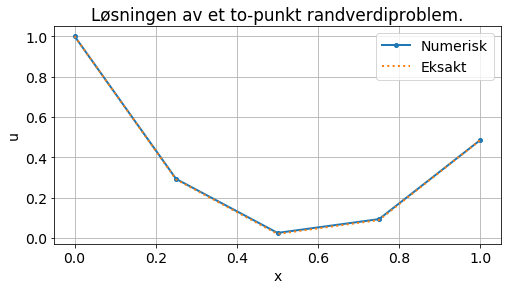

In [6]:
# Plott numerisk og eksakt løsning 
plot(x,U,'.-')
plot(x, u_eksakt(x),':')              # Plott eksakt løsning, hvis den er tilgjengelig.
xlabel('x')
ylabel('u')
legend(['Numerisk','Eksakt'])
title('Løsningen av et to-punkt randverdiproblem.');

Maks feil =  0.00498473484646


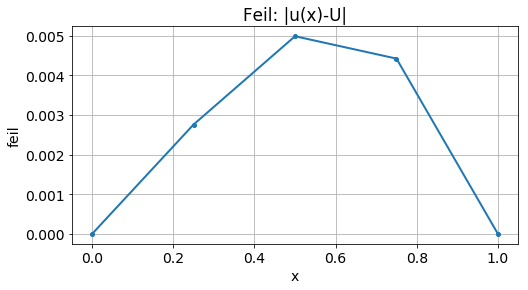

In [7]:
# Plott feilen |u(x)-U| i gitterpunktene
feil = abs(u_eksakt(x)-U)
plot(x, feil,'.-')
xlabel('x')
ylabel('feil')
title('Feil: |u(x)-U|');
print('Maks feil = ', max(feil))